In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
peer_pressure= {
    'gender':np.random.choice(['female','male'],110),
    'peer_pressure_scores':np.round(np.random.uniform(5,1,110),2),
    'academic_performance_GWA':np.round(np.random.uniform(95,80,110),2),
    'social_behavior':np.round(np.random.uniform(5,1,110),2),
}

df=pd.DataFrame(peer_pressure)
df.to_csv('peer_pressure_data.csv',index=False)

In [3]:
df=pd.read_csv('peer_pressure_data.csv')
print("Original Data Shape:",df.shape)

Original Data Shape: (110, 4)


In [4]:
df.loc[np.random.choice(df.index,10),'peer_pressure_scores']=np.nan
df.loc[np.random.choice(df.index,5),'academic_performance_GWA']=np.nan

In [5]:
df.to_csv('peer_pressure_data_miss.csv',index=False)

In [6]:
df=pd.read_csv('peer_pressure_data_miss.csv')
print("Original Data Shape:",df.shape)
df['peer_pressure_scores']=df['peer_pressure_scores'].fillna(df['peer_pressure_scores'].mean())
df=df.dropna(subset=['academic_performance_GWA'])
print("Cleaned Data Shape:",df.shape)
df.to_csv('peer_pressure_data_clean.csv',index=False)

Original Data Shape: (110, 4)
Cleaned Data Shape: (105, 4)


In [7]:
#Numpy
peer_pressure_scores=df['peer_pressure_scores'].to_numpy()
academic_performance_GWA=df['academic_performance_GWA'].to_numpy()
correlation=np.corrcoef(peer_pressure_scores,academic_performance_GWA)[0,1]
print(f"Correlation between peer pressure scores and academic performance GWA:{correlation:.2f}")

Correlation between peer pressure scores and academic performance GWA:-0.12


In [8]:
#Extra NumPy operation
median_social_behavior = np.median(df['social_behavior'])
print("Median social behavior:", median_social_behavior)

Median social behavior: 3.06


In [9]:
#Scipy
female_academic_performance_GWA=df[df['gender']=='female']['academic_performance_GWA']
male_academic_performance_GWA=df[df['gender']=='male']['academic_performance_GWA']
t_stat,p_value=stats.ttest_ind(female_academic_performance_GWA,male_academic_performance_GWA)
print(f"T-test between female and male academic performance GWA:t={t_stat:.2f},p={p_value:3f}")

T-test between female and male academic performance GWA:t=0.38,p=0.703457


In [10]:
#Statsmodels
X=sm.add_constant(df['academic_performance_GWA'])
model=sm.OLS(df['peer_pressure_scores'],X).fit()
print("\nlinear Regression Summary:")
print(model.summary())


linear Regression Summary:
                             OLS Regression Results                             
Dep. Variable:     peer_pressure_scores   R-squared:                       0.015
Model:                              OLS   Adj. R-squared:                  0.005
Method:                   Least Squares   F-statistic:                     1.519
Date:                  Wed, 21 May 2025   Prob (F-statistic):              0.221
Time:                          16:37:12   Log-Likelihood:                -159.54
No. Observations:                   105   AIC:                             323.1
Df Residuals:                       103   BIC:                             328.4
Df Model:                             1                                         
Covariance Type:              nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------

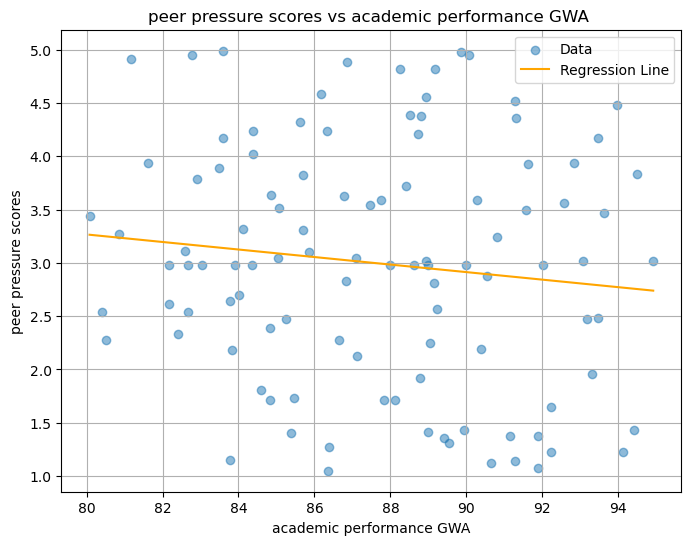

In [11]:
#Visualisation(Linear Registration) via Matplotlib
plt.figure(figsize=(8,6))
plt.scatter(df['academic_performance_GWA'],df['peer_pressure_scores'],alpha=0.5,label='Data')
x_range=np.linspace(df['academic_performance_GWA'].min(),df['academic_performance_GWA'].max(),100)
y_pred=model.params.iloc[0]+model.params.iloc[1]*x_range
plt.plot(x_range,y_pred,color='orange',label='Regression Line')
plt.title('peer pressure scores vs academic performance GWA ')
plt.xlabel('academic performance GWA')
plt.ylabel('peer pressure scores')
plt.legend()
plt.grid(True)
plt.show()

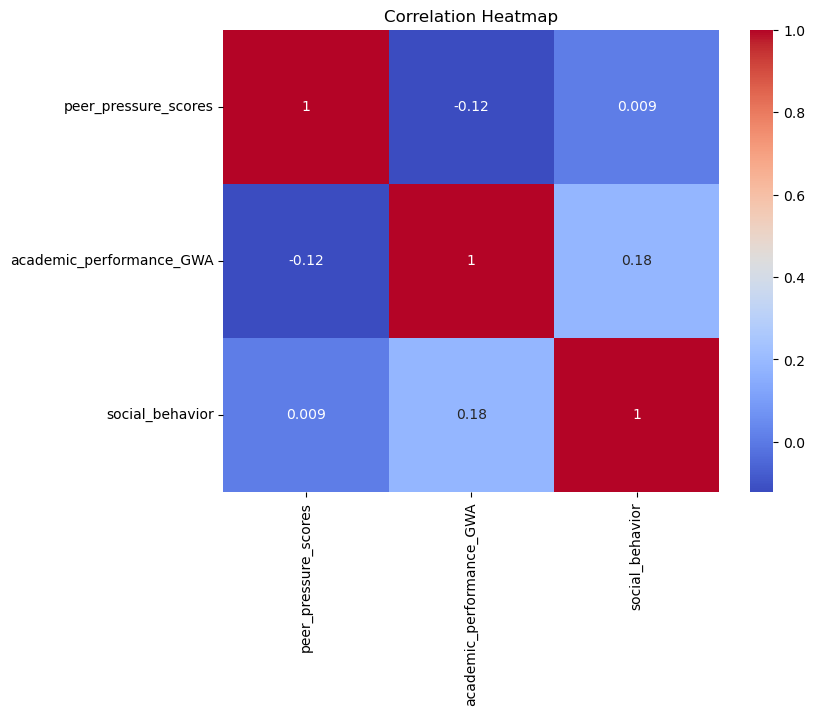

In [12]:
#Statistical visualisation(Boslot?Heatmap) via Seaborn
plt.figure(figsize=(8,6))
sns.boxplot(x='gender',y='social_behavior',data=df)
plt.title('Effect of social behavior depends on the gender')
plt.savefig('Effect_of_social_behavior_depends_on_the_gender.png')
plt.close()
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True),annot=True,cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.savefig('correlation_heatmap.png')
plt.show()

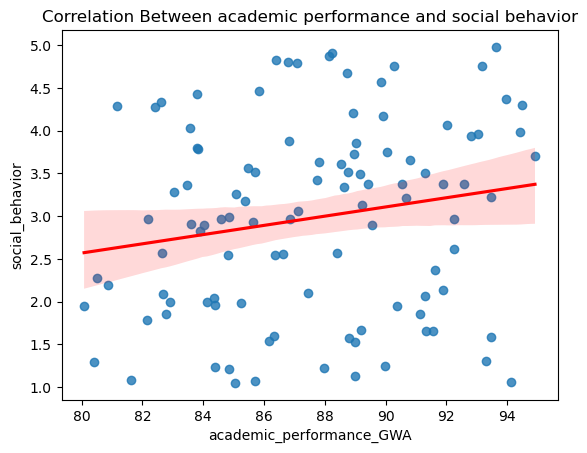

In [13]:
# Correlation plot with regression line
sns.regplot(data=df, x='academic_performance_GWA', y='social_behavior', line_kws={'color': 'red'})
plt.title('Correlation Between academic performance and social behavior')
plt.xlabel('academic_performance_GWA')
plt.ylabel('social_behavior')
plt.show()